This program constructs a qRAM with 2 qubits address register, ie., 4 memory locations. We feed in the memory with 
integers[1,5,7,10]. Although the memory is supposed to store classical information, we are representing the integers with qubits with an understanding that we do not intend to do any superposition of the content in any particular memory location. 
In order to check our program we are giving the input |11> to the address register and then measuring the readout register. For this we have included a classical register in the qRAM circuit. Of course, in the final qRAM there would be no measurement register. The check is to see if the output register gives |1010> with a high probability.

In [1]:
# initialization
import numpy as np

# import Qiskit
from qiskit import IBMQ, BasicAer , Aer, assemble
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import Permutation

# import basic plotting tools
from qiskit.visualization import plot_histogram
%matplotlib inline

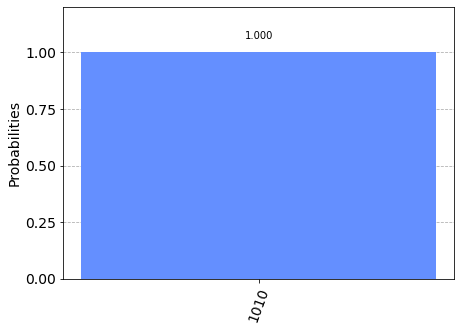

In [2]:
ar = QuantumRegister(2, "address")
fo = QuantumRegister(4, "fanout")
ro = QuantumRegister(4,"readout")

mr0 = QuantumRegister(4,"m00")
mr1 = QuantumRegister(4,"m01")
mr2 = QuantumRegister(4,"m10")
mr3 = QuantumRegister(4,"m11")
 
cr = ClassicalRegister(4,"memory content")    

qRAM = QuantumCircuit(ar,fo,mr0,mr1,mr2,mr3,ro,cr)


#Initialize the first qubit of the fanout regsiter in the |1> state
qRAM.x(fo[0])

##################################################################
#Feed in the address whose content we want to readout. Here we feed in |11>, the location of integer 10.
qRAM.x(ar[0])
qRAM.x(ar[1])
##################################################################



##################################################################
#Feed in data to the memory register. Need a program to convert vector input to string input. For now
#we just do it by hand in the individual memory locations

#feed in integer 1 in mr0
qRAM.x(mr0[0])

#feed in integer 5 in mr1
qRAM.x(mr1[0])
qRAM.x(mr1[2])

#feed in integer 7 in mr2
qRAM.x(mr2[0])
qRAM.x(mr2[1])
qRAM.x(mr2[2])

#feed in integer 10 in mr3
qRAM.x(mr3[1])
qRAM.x(mr3[3])
##################################################################

qRAM.barrier()

#Fanout process
qRAM.cx(ar[0],fo[1])
qRAM.cx(fo[1],fo[0])
qRAM.mct([ar[1],fo[0]],fo[2])  #Multi-controlled Toffoli to implement CCX gate
qRAM.mct([ar[1],fo[1]],fo[3])
qRAM.cx(fo[2],fo[0])
qRAM.cx(fo[3],fo[1])

qRAM.barrier()

#Readout process
qRAM.mct([fo[0],mr0[0]],ro[0])
qRAM.mct([fo[0],mr0[1]],ro[1])
qRAM.mct([fo[0],mr0[2]],ro[2])
qRAM.mct([fo[0],mr0[3]],ro[3])

qRAM.barrier()

qRAM.mct([fo[1],mr1[0]],ro[0])
qRAM.mct([fo[1],mr1[1]],ro[1])
qRAM.mct([fo[1],mr1[2]],ro[2])
qRAM.mct([fo[1],mr1[3]],ro[3])

qRAM.barrier()

qRAM.mct([fo[2],mr2[0]],ro[0])
qRAM.mct([fo[2],mr2[1]],ro[1])
qRAM.mct([fo[2],mr2[2]],ro[2])
qRAM.mct([fo[2],mr2[3]],ro[3])

qRAM.barrier()

qRAM.mct([fo[3],mr3[0]],ro[0])
qRAM.mct([fo[3],mr3[1]],ro[1])
qRAM.mct([fo[3],mr3[2]],ro[2])
qRAM.mct([fo[3],mr3[3]],ro[3])

#measurement of the readout register to see if we can retrieve the integer 10, ie, 1010 in memory location |11> 
qRAM.measure(ro[0],cr[0])
qRAM.measure(ro[1],cr[1])
qRAM.measure(ro[2],cr[2])
qRAM.measure(ro[3],cr[3])

qasm_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qRAM)
result = qasm_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

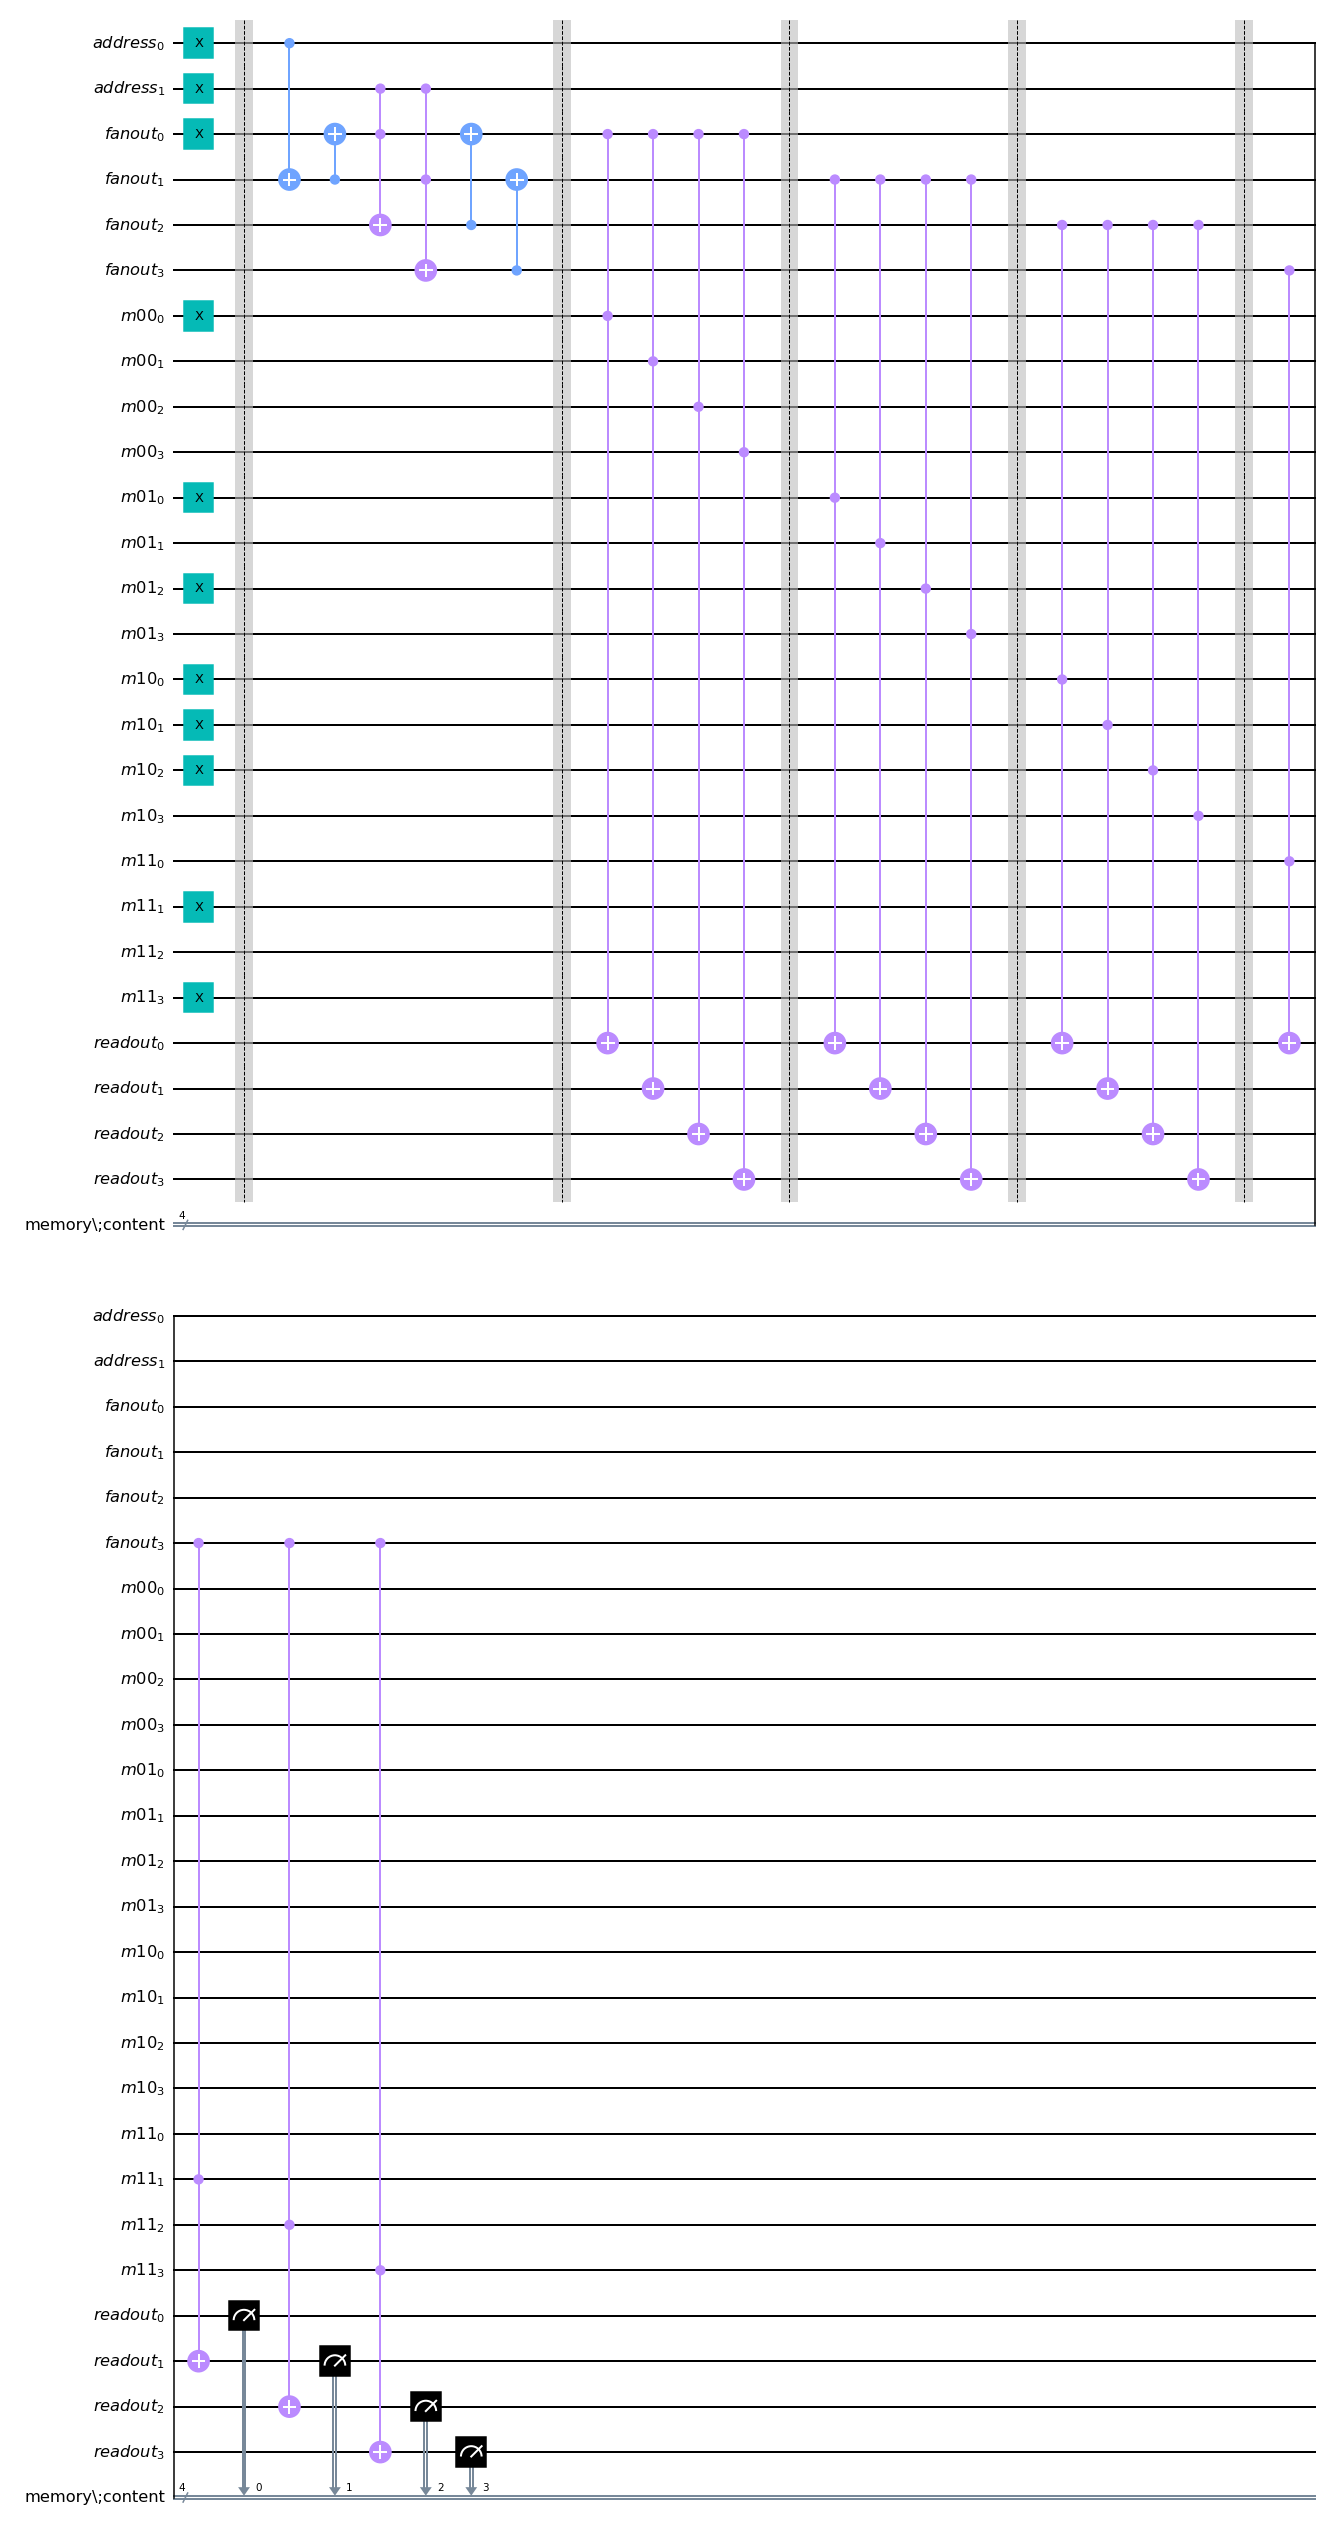

In [3]:
qRAM.draw()

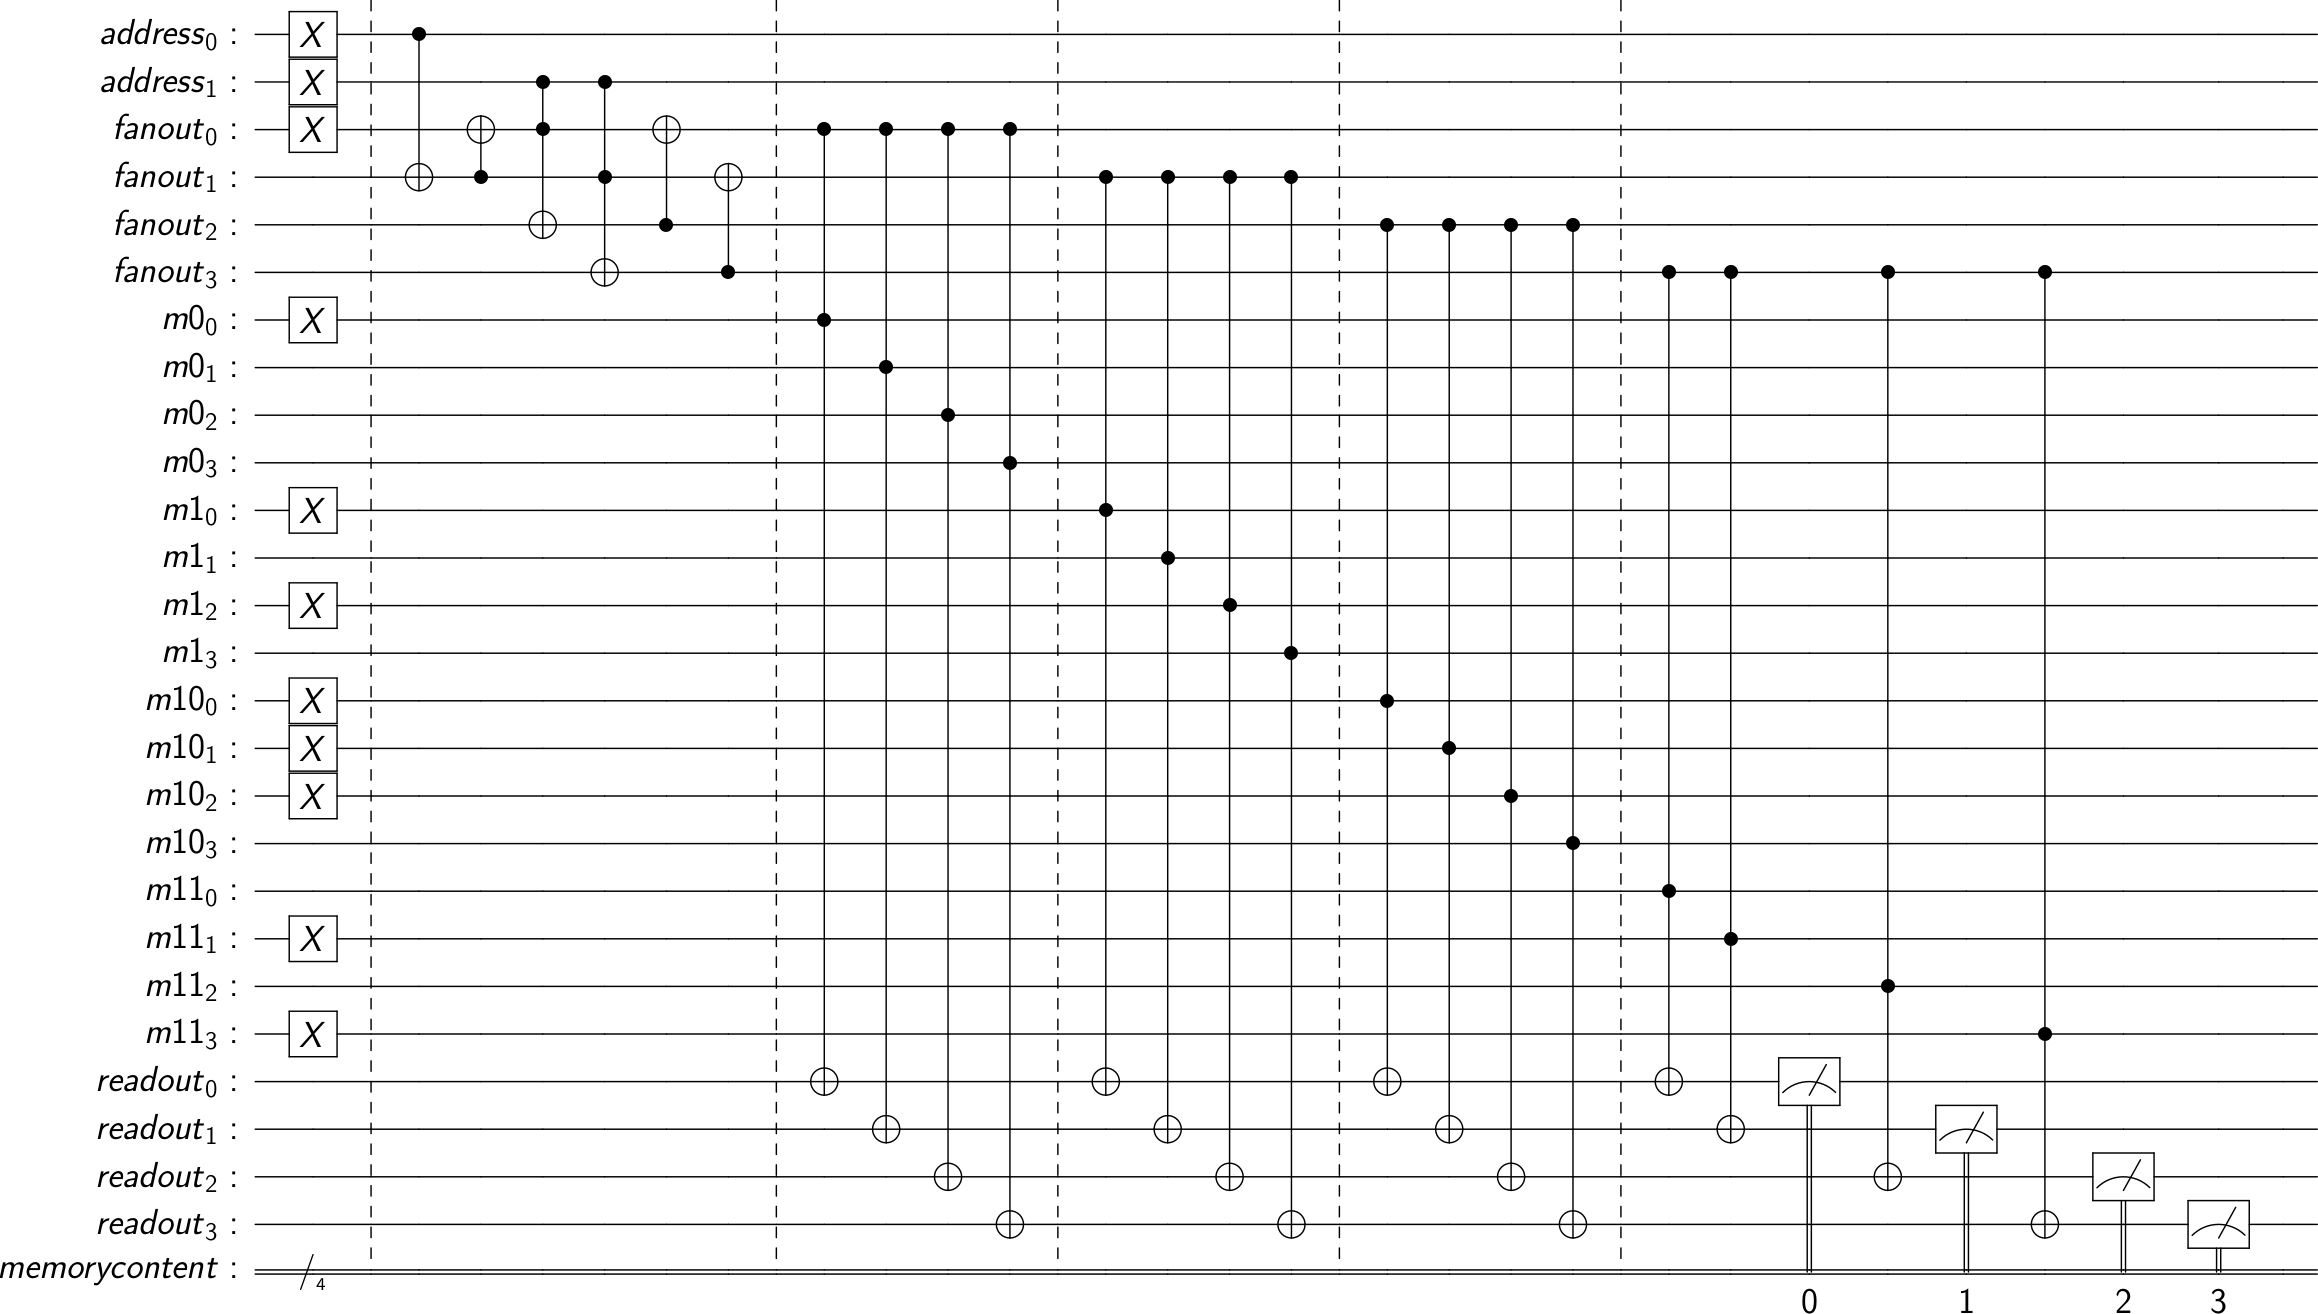

In [4]:
from qiskit.tools.visualization import circuit_drawer
circuit_drawer(qRAM, scale=None, filename=None, style=None, output='latex', interactive=False, plot_barriers=True, reverse_bits=False, justify=None, vertical_compression='high', idle_wires=True, with_layout=True, fold=None, ax=None, initial_state=False, cregbundle=True)